MD # 05 Case-study visualisation
MD Drill-down into one prompt, plot logit trajectories, attention maps (optional).


c:\Users\logan\Chain-of-thought-reasoning-for-LLMs\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Utils loaded — functions are now available in the namespace.


c:\Users\logan\Chain-of-thought-reasoning-for-LLMs\.venv\Lib\site-packages\transformers\generation\configuration_utils.py:820: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_hidden_states` is. When `return_dict_in_generate` is not `True`, `output_hidden_states` is ignored.
  warnings.warn(


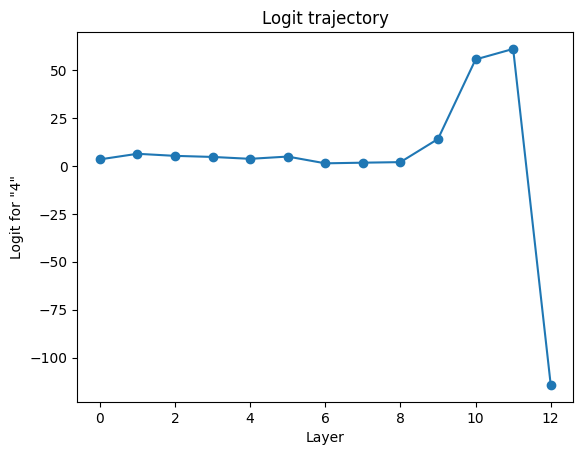

In [1]:
import torch, matplotlib.pyplot as plt
from pathlib import Path
import sys, pathlib, importlib
sys.path.append(str(pathlib.Path('..').resolve()))   # let Python see project root

from src.utils import set_seed, load_model, load_prompts, DEVICE


prompt_idx = 0  # pick a prompt
prompts = load_prompts('../data/reasoning_prompts.json')
model, tok = load_model('gpt2')
ids = tok(prompts[prompt_idx], return_tensors='pt').input_ids.to(DEVICE)

a = model(ids, output_hidden_states=True)
logits = a.logits.detach()
hidden = torch.stack(a.hidden_states)  # (layers+1, b, s, d)

# plot logit trajectory for token of interest
layer_range = range(hidden.shape[0])
target_id = tok(' 4').input_ids[0]
vals = [model.lm_head(h[0])[-1, target_id].item() for h in hidden]
plt.plot(layer_range, vals, marker='o')
plt.xlabel('Layer'); plt.ylabel('Logit for \"4\"'); plt.title('Logit trajectory')
plt.show()